In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging

In [139]:
df= pd.read_csv("data/stud.csv")

In [140]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [141]:
df.shape

(1000, 8)

In [142]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [143]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [144]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [145]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [147]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [148]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [149]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [150]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [151]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [152]:
for cols in df:
    if(cols != 'math_score' and cols != 'reading_score' and cols != 'writing_score'):
        print("Categories in " , cols, "are", df[cols].unique())
    elif(df[cols].dtype == 'int64'):
        print(cols," is numerical columns")

Categories in  gender are ['female' 'male']
Categories in  race_ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in  parental_level_of_education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in  lunch are ['standard' 'free/reduced']
Categories in  test_preparation_course are ['none' 'completed']
math_score  is numerical columns
reading_score  is numerical columns
writing_score  is numerical columns


In [153]:
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']

In [154]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [155]:
df['Average']=df['Total_score']/3

In [156]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [157]:
for cols in df:
    if(df[cols].dtype=='int64'):
        print("Number of people who got 100/100 in", cols, "are", (df[cols]==100).sum())

Number of people who got 100/100 in math_score are 7
Number of people who got 100/100 in reading_score are 17
Number of people who got 100/100 in writing_score are 14
Number of people who got 100/100 in Total_score are 0


In [158]:
df['math_score'].dtype

dtype('int64')

<Axes: xlabel='Total_score', ylabel='Count'>

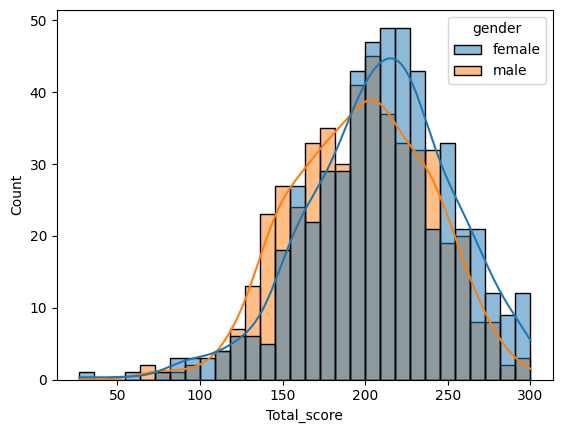

In [159]:
sns.histplot(data=df, x=df['Total_score'], hue='gender', kde=True, bins=30)

<Axes: xlabel='Average', ylabel='Count'>

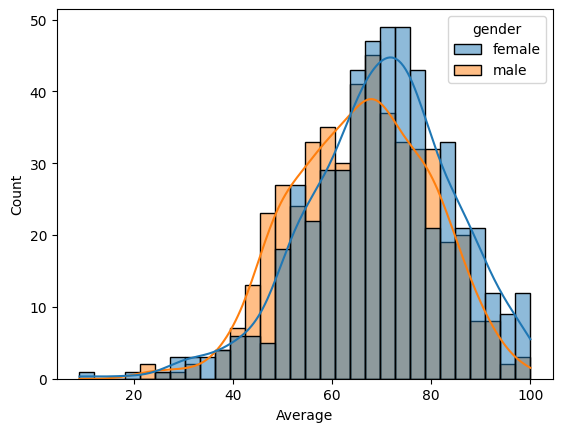

In [160]:
sns.histplot(data=df, x=df['Average'], hue='gender', kde=True, bins=30)

<Axes: xlabel='Total_score', ylabel='Count'>

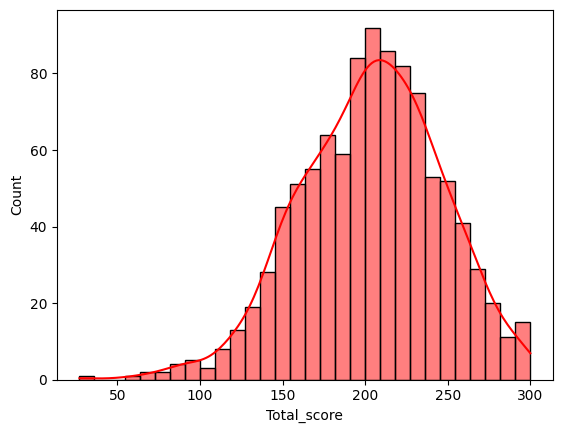

In [161]:
sns.histplot(data=df, x='Total_score', bins=30, kde=True, color='red')

<Axes: xlabel='Total_score', ylabel='Count'>

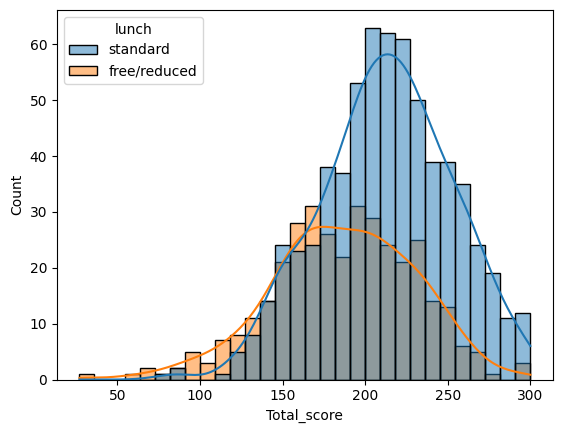

In [162]:
sns.histplot(data=df, x=df['Total_score'], hue='lunch', kde=True, bins=30)

<Axes: xlabel='Total_score', ylabel='Count'>

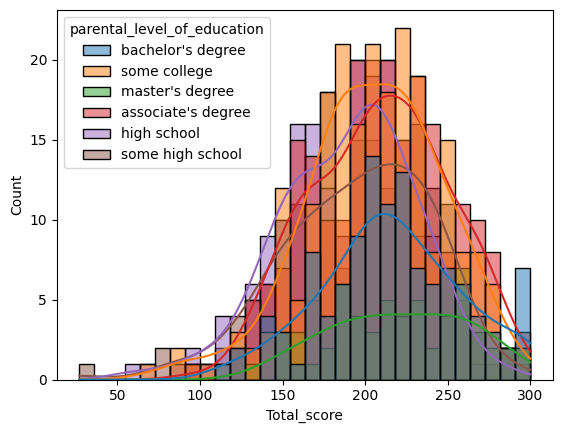

In [163]:
sns.histplot(data=df, x=df['Total_score'], kde=True, hue=df['parental_level_of_education'], bins=30)

<Axes: xlabel='Total_score'>

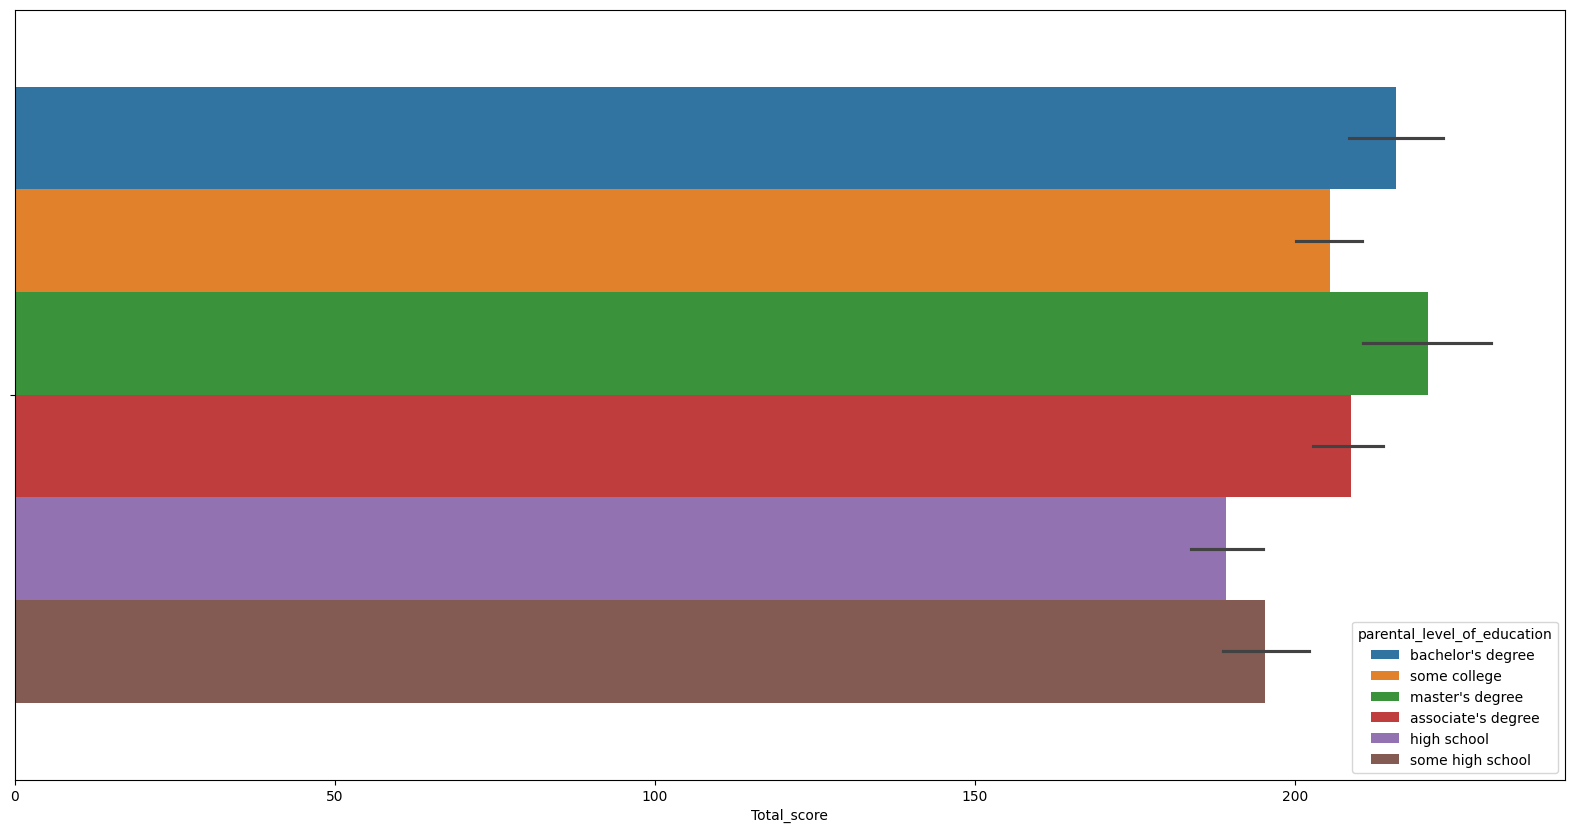

In [164]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x=df['Total_score'], hue=df['parental_level_of_education'],)

<Axes: xlabel='Total_score', ylabel='Count'>

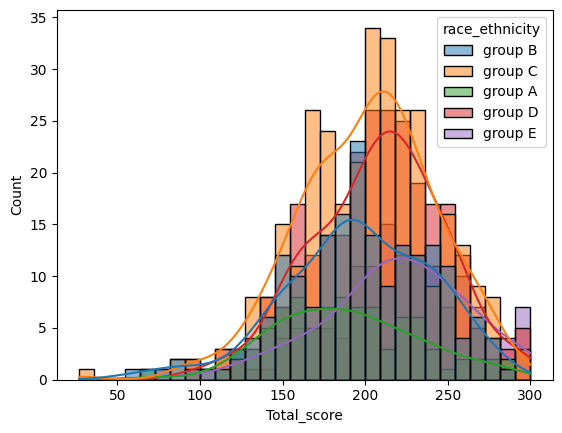

In [165]:
sns.histplot(data=df, x=df['Total_score'], hue=df['race_ethnicity'], kde=True, bins=30)

([<matplotlib.patches.Wedge at 0x163a38430>,
 [Text(-0.062170487413935493, 1.0982416994881927, ''),
  Text(0.062170321584051766, -1.0982417088756626, '')],
 [Text(-0.03391117495305572, 0.5990409269935596, '.51.799999%'),
  Text(0.03391108450039187, -0.5990409321139978, '.48.200001%')])

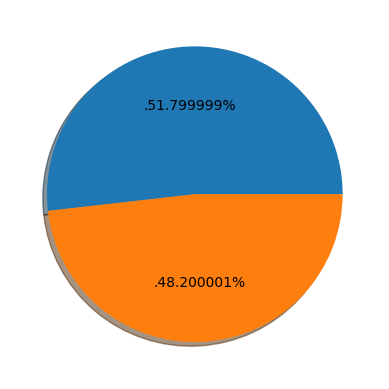

In [166]:
plt.pie(data=df, shadow=True, x=df['gender'].value_counts(), autopct='.%2f%%')

/var/folders/28/g_3pc0wn3lbbrghm76zvx92h0000gn/T/ipykernel_43005/736406687.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x=df['gender'], palette="deep")


[Text(0, 0, '518')]

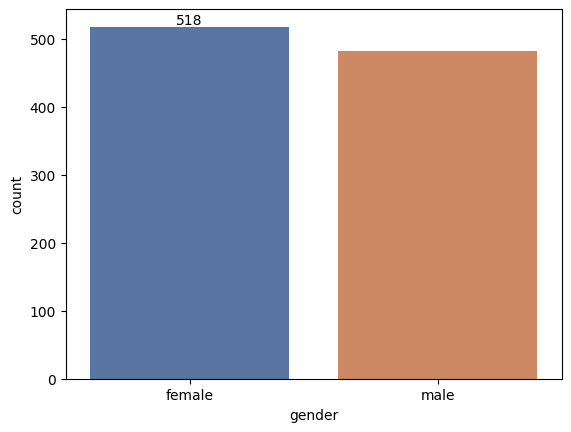

In [167]:
ax=sns.countplot(data=df, x=df['gender'], palette="deep")
ax.bar_label(ax.containers[0], color="black", size=10)

In [168]:
total_score_groupby= df.groupby('gender')['Total_score'].mean()
total_score_groupby

gender
female    208.708494
male      197.512448
Name: Total_score, dtype: float64

In [169]:
math_score_groupby=df.groupby('gender')['math_score'].mean()
math_score_groupby

gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64

In [170]:
total_score_by_lunch=df.groupby('lunch')['Total_score'].mean()
total_score_by_lunch

lunch
free/reduced    186.597183
standard        212.511628
Name: Total_score, dtype: float64

In [171]:
total_score_by_ethnicity=df.groupby('race_ethnicity')['Total_score'].mean()
total_score_by_ethnicity

race_ethnicity
group A    188.977528
group B    196.405263
group C    201.394984
group D    207.538168
group E    218.257143
Name: Total_score, dtype: float64

In [172]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'Average'],
      dtype='object')

In [173]:
df.groupby(['lunch', 'race_ethnicity'])['Total_score'].mean()

lunch         race_ethnicity
free/reduced  group A           172.972222
              group B           182.927536
              group C           181.236842
              group D           194.000000
              group E           202.487805
standard      group A           199.849057
              group B           204.090909
              group C           212.604878
              group D           215.239521
              group E           224.787879
Name: Total_score, dtype: float64

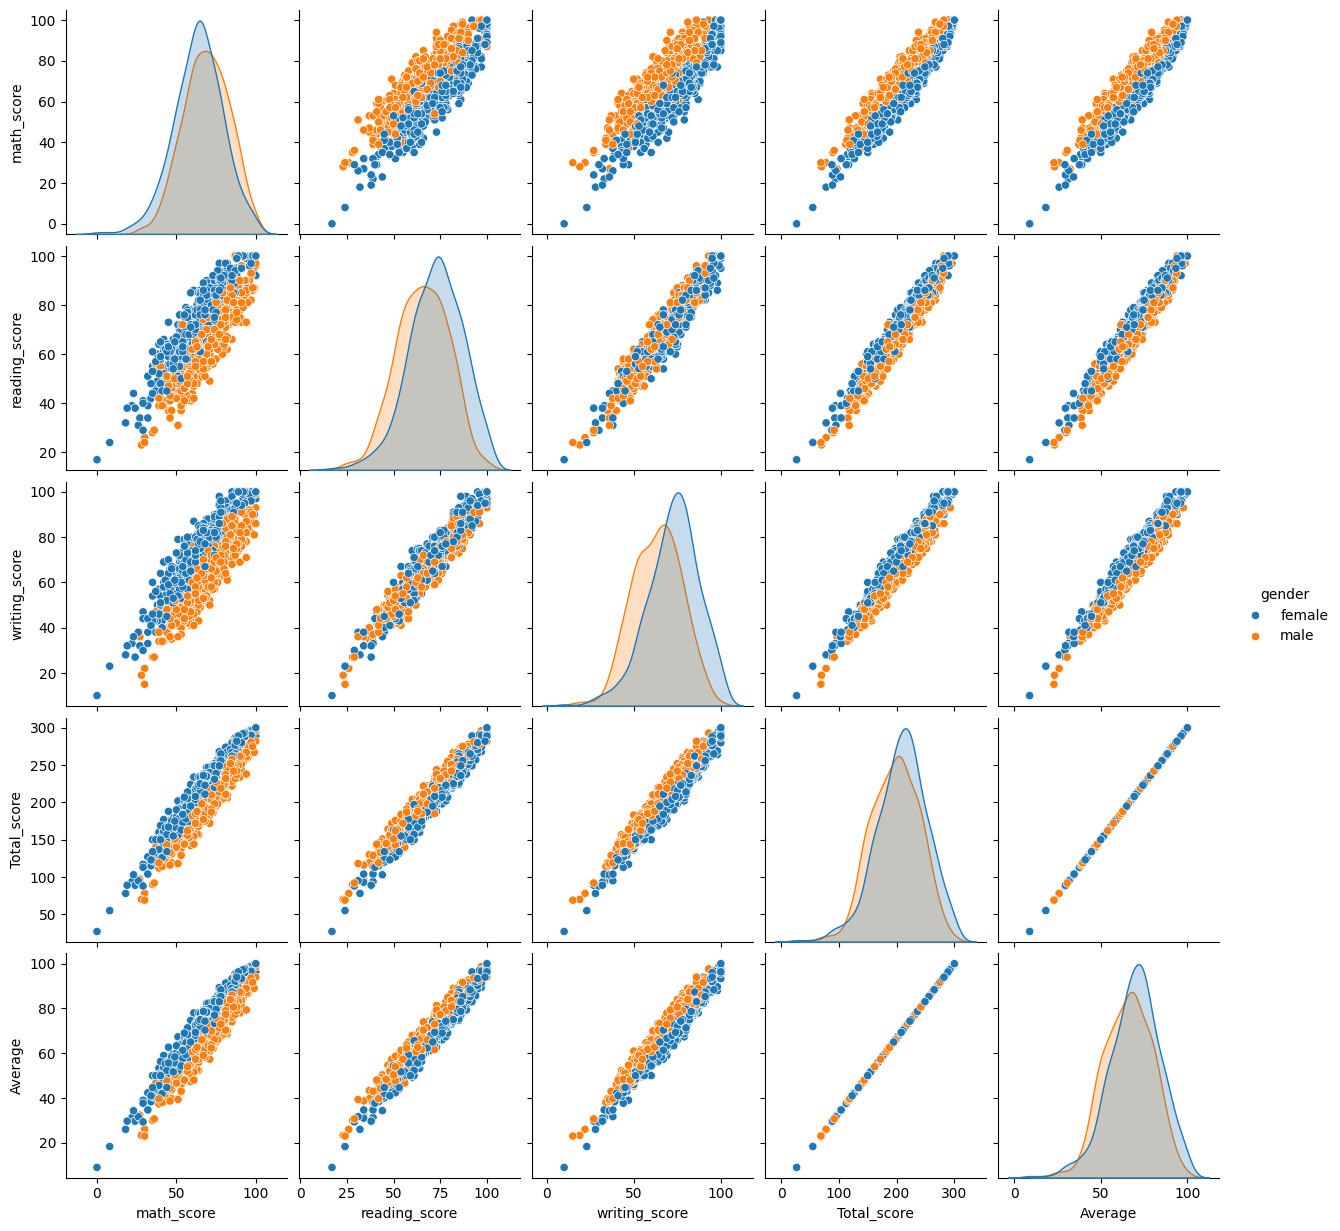

In [174]:
sns.pairplot(df, hue='gender')

/var/folders/28/g_3pc0wn3lbbrghm76zvx92h0000gn/T/ipykernel_43005/2335408550.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df['race_ethnicity'], palette='bright')


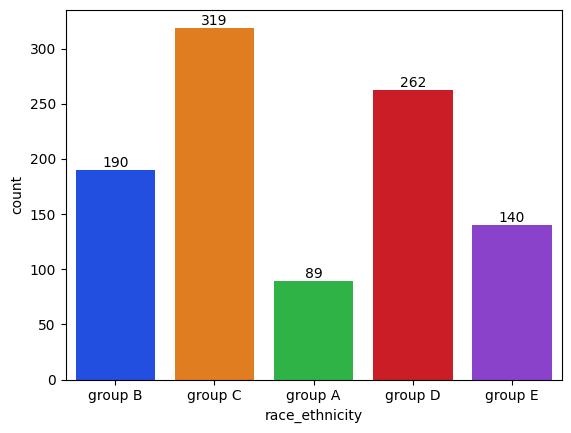

In [175]:
ax=sns.countplot(x=df['race_ethnicity'], palette='bright')
for i in range(0,(df['race_ethnicity'].nunique())):
    ax.bar_label(ax.containers[i], color='black')

([<matplotlib.patches.Wedge at 0x16519d7e0>,
 [Text(0.6461720141062023, 1.0111684964366394, ''),
  Text(-1.1412678045252824, 0.3708204395041376, ''),
  Text(-0.5380599473435599, -1.0726096648197077, ''),
  Text(0.6493453646309493, -1.009133587505787, ''),
  Text(1.1533984631722705, -0.33116760885063146, '')],
 [Text(0.3769336748952847, 0.5898482895880396, '31.9%'),
  Text(-0.665739552639748, 0.21631192304408028, '26.2%'),
  Text(-0.31386830261707654, -0.6256889711448295, '19.0%'),
  Text(0.3787847960347204, -0.5886612593783757, '14.0%'),
  Text(0.6728157701838243, -0.19318110516286835, '8.9%')])

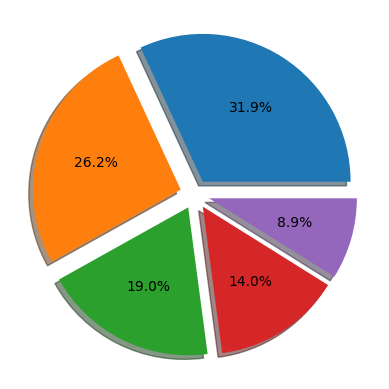

In [176]:
plt.pie(x=df['race_ethnicity'].value_counts(), autopct='%1.1f%%', shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.1])

/var/folders/28/g_3pc0wn3lbbrghm76zvx92h0000gn/T/ipykernel_43005/3514397155.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot( x=df['race_ethnicity'], y=df['math_score'], palette='mako')


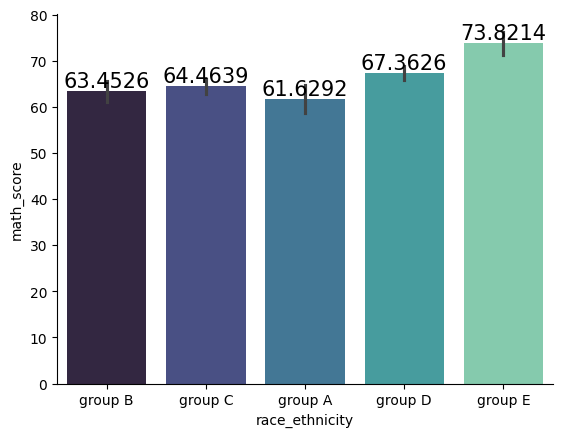

In [177]:
ax=sns.barplot( x=df['race_ethnicity'], y=df['math_score'], palette='mako')
for i in range(0,(df['race_ethnicity']).nunique()):
    ax.bar_label(ax.containers[i], size=15)
sns.despine(top=True)
plt.show()

/var/folders/28/g_3pc0wn3lbbrghm76zvx92h0000gn/T/ipykernel_43005/1007867288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
/var/folders/28/g_3pc0wn3lbbrghm76zvx92h0000gn/T/ipykernel_43005/1007867288.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
/var/folders/28/g_3pc0wn3lbbrghm76zvx92h0000gn/T/ipykernel_43005/1007867288.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

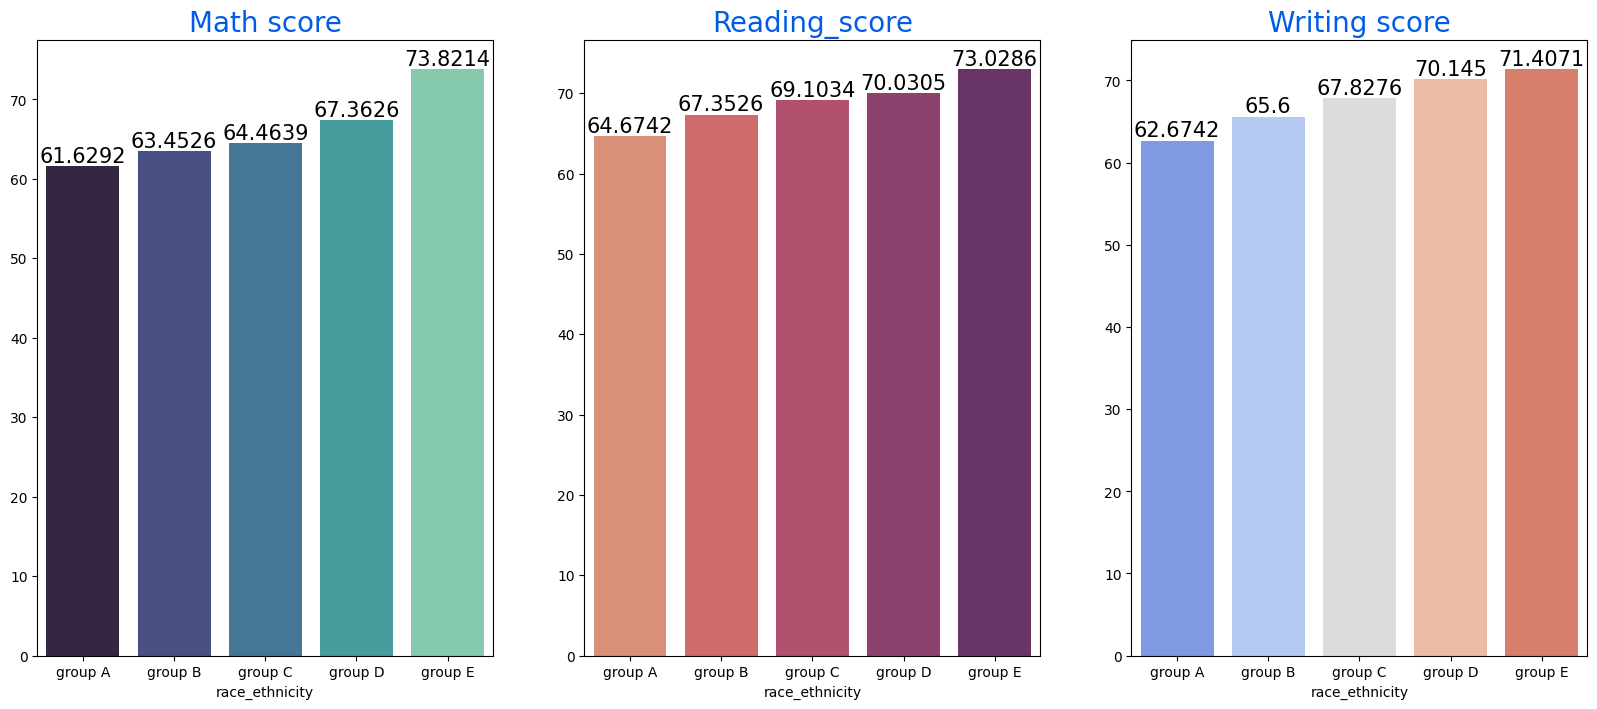

In [178]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [180]:
df_performance_by_lunch=df.groupby(['lunch', 'gender']).agg({'math_score':'mean', 'reading_score':'mean', 'writing_score':'mean'}).reset_index()
    

df_performance_by_lunch

,lunch,gender,math_score,reading_score,writing_score
0,free/reduced,female,55.814815,67.386243,66.444444
1,free/reduced,male,62.457831,61.542169,59.126506
2,standard,female,68.124620,75.607903,75.927052
3,standard,male,72.022152,67.537975,65.509494


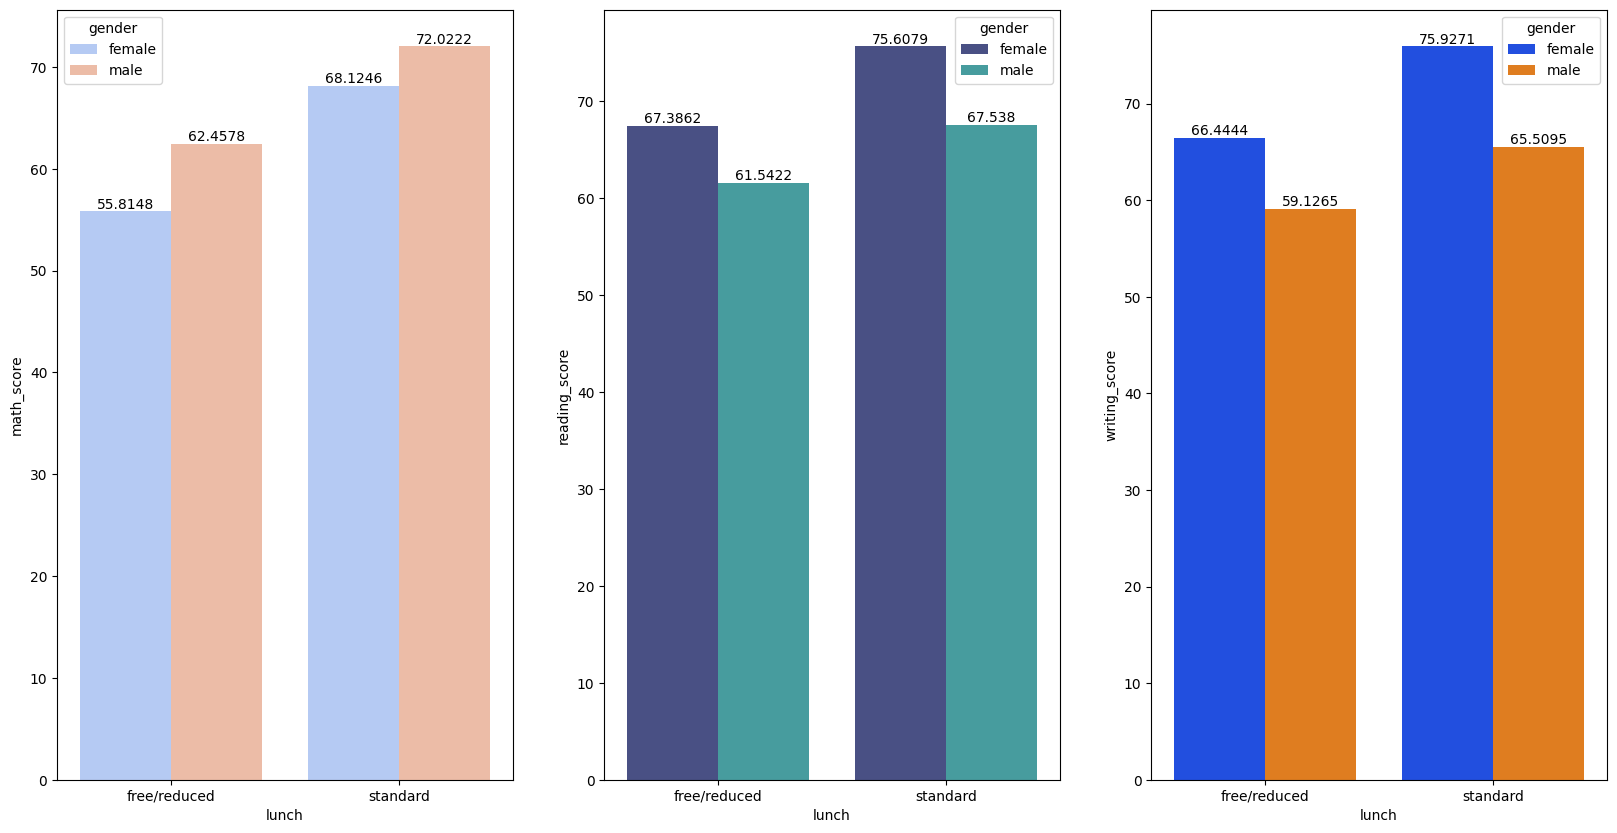

In [182]:
f,ax=plt.subplots(1,3, figsize=(20,10))

sns.barplot(x=df_performance_by_lunch['lunch'], y=df_performance_by_lunch['math_score'], ax=ax[0],hue=df_performance_by_lunch['gender'], palette='coolwarm') 
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

sns.barplot(x=df_performance_by_lunch['lunch'], y=df_performance_by_lunch['reading_score'], ax=ax[1],hue=df_performance_by_lunch['gender'], palette='mako') 
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10)

sns.barplot(x=df_performance_by_lunch['lunch'], y=df_performance_by_lunch['writing_score'], ax=ax[2],hue=df_performance_by_lunch['gender'], palette='bright') 
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=10)
